In [1]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2022-10-09 11:17:29--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.163
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  11.2MB/s    in 15s     

2022-10-09 11:17:45 (9.71 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

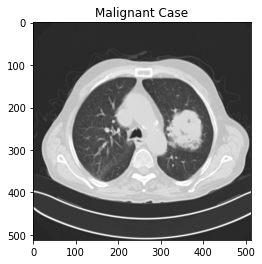

In [3]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [4]:
img_width = 64
img_height = 64

In [5]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [6]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")

Found 970 images belonging to 3 classes.


In [7]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 107 images belonging to 3 classes.


In [8]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
#model.add(Dropout(0.4))

model.add(Dense(3, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [12]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

In [13]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=50, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/50
61/61 [==============================] - 12s 186ms/step - loss: 0.9877 - accuracy: 0.4722 - val_loss: 0.9728 - val_accuracy: 0.3832
Epoch 2/50
61/61 [==============================] - 11s 180ms/step - loss: 0.9500 - accuracy: 0.5093 - val_loss: 0.9603 - val_accuracy: 0.5140
Epoch 3/50
61/61 [==============================] - 11s 180ms/step - loss: 0.8906 - accuracy: 0.5794 - val_loss: 0.9979 - val_accuracy: 0.5327
Epoch 4/50
61/61 [==============================] - 11s 180ms/step - loss: 0.6828 - accuracy: 0.7402 - val_loss: 1.1111 - val_accuracy: 0.5047
Epoch 5/50
61/61 [==============================] - 11s 179ms/step - loss: 0.5093 - accuracy: 0.8103 - val_loss: 1.1486 - val_accuracy: 0.5327
Epoch 6/50
61/61 [==============================] - 11s 179ms/step - loss: 0.3515 - accuracy: 0.8742 - val_loss: 1.0053 - val_accuracy: 0.5794
Epoch 7/50
61/61 [==============================] - 11s 180ms/step - loss: 0.2791 - accuracy: 0.8845 - val_loss: 1.2092 - val_accuracy: 0.6262